# Importações

In [1]:
import sys, os
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [2]:
# Definindo raiz do projeto
BASE_DIR = Path(os.getcwd()).parent
sys.path.append(str(BASE_DIR))

In [3]:
# Definindo diretório de dados de entrada
DATA_DIR = BASE_DIR / "dados" / "dataset_final"

In [4]:
# Recebe dataset com alguns os clientes clusterizados com alguns dos dados de interesse para análise
df = pd.read_csv(DATA_DIR / 'clientes_clusterizados_completo.csv', sep=';')

# Análise dos Clusters

In [23]:
df

,CD_CLIENTE,DS_PROD_MODA,DS_LIN_REC_MODA,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,MARCA_TOTVS_MODA,MODAL_COMERC_MODA,PAIS,...,MRR_12M_median,resposta_NPS,resposta_unidade,Nota_SupTec_Agilidade,Nota_SupTec_Atendimento,Nota_Comercial,Nota_Custos,Nota_AdmFin_Atendimento,Nota_Software,Nota_Software_Atualizacao
0,99069,CLOUD IAAS 36M,SAAS SERIE T,SAOPAULO,COMERCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,VAREJO,VAREJO,CLOUD,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,99958,ADESAO TOTVS P,SAAS SMS ALUGUEL,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,CROSS - TRADICIONAL,MODALIDADE ALUGUEL (LEGADO),105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99999,CR.WN06.CsA,CDU TOTVS SERIE T,SAOPAULO,Desenvolvimento de programas de computador sob...,TOTVS,TOTVS,MODALIDADE TRADICIONAL,MODALIDADE TRADICIONAL,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CARAMU,ADESAO OT LOG PLA 500 VIAGENS,CDU TOTVS SERIE T,ITUMBIARA,"Fabricacao de oleos vegetais refinados, exceto...",MANUFATURA,BENS DE CONSUMO,OTIMIZACAO LOGISTICA,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,2070.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T00018,CDU LGT G CAP HUMANO TRAD,CDU TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,HOSPITALIDADE - CORE,MODALIDADE TRADICIONAL,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,TFEEXW,05 IDS FLUIG PLATAFORMA,SAAS INTERA SOFTWARE,BELOHORIZONTE,"Atividades de atendimento hospitalar, exceto p...",SAUDE,HOSPITAIS,RH - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10611,TFEEYC,TEF TOTVS CLOUD PDV PRINCIPAL,SAAS TEF,GOIANIA,Comercio varejista de calcados,VAREJO,MODA,DISTRIBUICAO & VAREJO - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10612,TFEEYH,CONS SAT OU MFE BALANC SUBSC,SAAS SERIE T,ITAITINGA,"Comercio varejista de mercadorias em geral, co...",VAREJO,SUPERMERCADO,SUPERMERCADOS - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10613,TFEEYP,ALMOXARIFADO E ESTOQUE,SAAS CMNET HOTAL,CANELA,Hoteis,HOSPITALITY,HOSPEDAGEM,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10615 entries, 0 to 10614
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CD_CLIENTE                     10615 non-null  object 
 1   DS_PROD_MODA                   10615 non-null  object 
 2   DS_LIN_REC_MODA                10615 non-null  object 
 3   CIDADE                         10615 non-null  object 
 4   DS_CNAE                        10615 non-null  object 
 5   DS_SEGMENTO                    10615 non-null  object 
 6   DS_SUBSEGMENTO                 10615 non-null  object 
 7   MARCA_TOTVS_MODA               10615 non-null  object 
 8   MODAL_COMERC_MODA              10615 non-null  object 
 9   PAIS                           10615 non-null  int64  
 10  PERIODICIDADE_MODA             10615 non-null  object 
 11  UF                             10615 non-null  object 
 12  VL_TOTAL_CONTRATO_SOMA         10615 non-null 

In [7]:
df.columns

Index(['CD_CLIENTE', 'DS_PROD_MODA', 'DS_LIN_REC_MODA', 'CIDADE', 'DS_CNAE',
       'DS_SEGMENTO', 'DS_SUBSEGMENTO', 'MARCA_TOTVS_MODA',
       'MODAL_COMERC_MODA', 'PAIS', 'PERIODICIDADE_MODA', 'UF',
       'VL_TOTAL_CONTRATO_SOMA', 'FAIXA_VLR_TOT_SOMA_CONTRATOS',
       'DIAS_CLIENTE', 'QTD_CONTRATACOES_12M', 'VLR_CONTRATACOES_12M',
       'CLUSTER_3', 'CLUSTER_4', 'CLUSTER_5', 'CLUSTER_6',
       'telemetria_moduloid_moda', 'telemetria_productlineid_moda',
       'telemetria_slotid_moda', 'telemetria_statuslicenca_moda',
       'telemetria_contagem', 'NR_PROPOSTA_count', 'ITEM_PROPOSTA_agg_moda',
       'HOSPEDAGEM_agg_moda', 'FAT_FAIXA_agg_moda', 'CD_PROD_agg_moda',
       'QTD_median', 'QTD_sum', 'VL_PCT_DESC_TEMP_median',
       'VL_PCT_DESC_TEMP_sum', 'VL_PCT_DESCONTO_median', 'VL_PCT_DESCONTO_sum',
       'PRC_UNITARIO_median', 'PRC_UNITARIO_sum',
       'VL_DESCONTO_TEMPORARIO_median', 'VL_DESCONTO_TEMPORARIO_sum',
       'VL_TOTAL_median', 'VL_TOTAL_sum', 'VL_FULL_median', 'V

In [8]:
# Eliminando as colunas de clusters que não serão utilizadas
df.drop(columns=['CLUSTER_3', 'CLUSTER_4', 'CLUSTER_6'], inplace=True)

## Agrupamento por Cluster

In [9]:
# Definindo função de agregação pela moda
def agg_moda(x):
    m = x.dropna().mode()
    if not m.empty:
        return m.iloc[0]
    return np.nan

In [10]:
# Definindo função de agregação pelo top 5 da moda
def top5_comuns(x):
    return x.dropna().value_counts().head(5).index.tolist()

In [11]:
# Agregando os dados por cluster 5, utilizando a média para as colunas numéricas e a moda para as colunas categóricas
df_agrupado = df.groupby('CLUSTER_5').agg(
    QTD_CLIENTES=('CD_CLIENTE', 'nunique'),
    DS_PROD_moda=('DS_PROD_MODA', agg_moda),
    DS_PROD_top5=('DS_PROD_MODA', top5_comuns),
    DS_LIN_REC_moda=('DS_LIN_REC_MODA', agg_moda),
    DS_LIN_REC_top5=('DS_LIN_REC_MODA', top5_comuns),
    CIDADE_moda=('CIDADE', agg_moda),
    CIDADE_top5=('CIDADE', top5_comuns),
    DS_CNAE_moda=('DS_CNAE', agg_moda),
    DS_CNAE_top5=('DS_CNAE', top5_comuns),
    DS_SEGMENTO_moda=('DS_SEGMENTO', agg_moda),
    DS_SEGMENTO_top5=('DS_SEGMENTO', top5_comuns),
    DS_SUBSEGMENTO_moda=('DS_SUBSEGMENTO', agg_moda),
    DS_SUBSEGMENTO_top5=('DS_SUBSEGMENTO', top5_comuns),
    MARCA_TOTVS_moda=('MARCA_TOTVS_MODA', agg_moda),
    MARCA_TOTVS_top5=('MARCA_TOTVS_MODA', top5_comuns),
    MODAL_COMERC_moda=('MODAL_COMERC_MODA', agg_moda),
    MODAL_COMERC_top5=('MODAL_COMERC_MODA', top5_comuns),
    PAIS_moda=('PAIS', agg_moda),
    PAIS_top5=('PAIS', top5_comuns),
    PERIODICIDADE_moda=('PERIODICIDADE_MODA', agg_moda),
    PERIODICIDADE_top5=('PERIODICIDADE_MODA', top5_comuns),
    UF_moda=('UF', agg_moda),
    UF_top5=('UF', top5_comuns),
    VL_TOTAL_CONTRATO_sum=('VL_TOTAL_CONTRATO_SOMA', 'sum'),
    VL_TOTAL_CONTRATO_median=('VL_TOTAL_CONTRATO_SOMA', 'median'),
    VL_TOTAL_CONTRATO_mean=('VL_TOTAL_CONTRATO_SOMA', 'mean'),
    VL_TOTAL_CONTRATO_min=('VL_TOTAL_CONTRATO_SOMA', 'min'),
    VL_TOTAL_CONTRATO_max=('VL_TOTAL_CONTRATO_SOMA', 'max'),
    FAIXA_VLR_TOT_SOMA_CONTRATOS_moda=('FAIXA_VLR_TOT_SOMA_CONTRATOS', agg_moda),
    FAIXA_VLR_TOT_SOMA_CONTRATOS_top5=('FAIXA_VLR_TOT_SOMA_CONTRATOS', top5_comuns),
    DIAS_CLIENTE_median=('DIAS_CLIENTE', 'median'),
    DIAS_CLIENTE_mean=('DIAS_CLIENTE', 'mean'),
    DIAS_CLIENTE_min=('DIAS_CLIENTE', 'min'),
    DIAS_CLIENTE_max=('DIAS_CLIENTE', 'max'),
    QTD_CONTRATACOES_12M_sum=('QTD_CONTRATACOES_12M', 'sum'),
    QTD_CONTRATACOES_12M_median=('QTD_CONTRATACOES_12M', 'median'),
    QTD_CONTRATACOES_12M_mean=('QTD_CONTRATACOES_12M', 'mean'),
    QTD_CONTRATACOES_12M_min=('QTD_CONTRATACOES_12M', 'min'),
    QTD_CONTRATACOES_12M_max=('QTD_CONTRATACOES_12M', 'max'),
    VLR_CONTRATACOES_12M_sum=('VLR_CONTRATACOES_12M', 'sum'),
    VLR_CONTRATACOES_12M_median=('VLR_CONTRATACOES_12M', 'median'),
    VLR_CONTRATACOES_12M_mean=('VLR_CONTRATACOES_12M', 'mean'),
    VLR_CONTRATACOES_12M_min=('VLR_CONTRATACOES_12M', 'min'),
    VLR_CONTRATACOES_12M_max=('VLR_CONTRATACOES_12M', 'max'),
    resposta_NPS_median=('resposta_NPS', 'median'),
    resposta_NPS_mean=('resposta_NPS', 'mean'),
    resposta_NPS_min=('resposta_NPS', 'min'),
    resposta_NPS_max=('resposta_NPS', 'max'),
    resposta_unidade_median=('resposta_unidade', 'median'),
    resposta_unidade_mean=('resposta_unidade', 'mean'),
    resposta_unidade_min=('resposta_unidade', 'min'),
    resposta_unidade_max=('resposta_unidade', 'max'),
    Nota_SupTec_Agilidade_median=('Nota_SupTec_Agilidade', 'median'),
    Nota_SupTec_Agilidade_mean=('Nota_SupTec_Agilidade', 'mean'),
    Nota_SupTec_Agilidade_min=('Nota_SupTec_Agilidade', 'min'),
    Nota_SupTec_Agilidade_max=('Nota_SupTec_Agilidade', 'max'),
    Nota_SupTec_Atendimento_median=('Nota_SupTec_Atendimento', 'median'),
    Nota_SupTec_Atendimento_mean=('Nota_SupTec_Atendimento', 'mean'),
    Nota_SupTec_Atendimento_min=('Nota_SupTec_Atendimento', 'min'),
    Nota_SupTec_Atendimento_max=('Nota_SupTec_Atendimento', 'max'),
    Nota_Comercial_median=('Nota_Comercial', 'median'),
    Nota_Comercial_mean=('Nota_Comercial', 'mean'),
    Nota_Comercial_min=('Nota_Comercial', 'min'),
    Nota_Comercial_max=('Nota_Comercial', 'max'),
    Nota_Custos_median=('Nota_Custos', 'median'),
    Nota_Custos_mean=('Nota_Custos', 'mean'),
    Nota_Custos_min=('Nota_Custos', 'min'),
    Nota_Custos_max=('Nota_Custos', 'max'),
    Nota_AdmFin_Atendimento_median=('Nota_AdmFin_Atendimento', 'median'),
    Nota_AdmFin_Atendimento_mean=('Nota_AdmFin_Atendimento', 'mean'),
    Nota_AdmFin_Atendimento_min=('Nota_AdmFin_Atendimento', 'min'),
    Nota_AdmFin_Atendimento_max=('Nota_AdmFin_Atendimento', 'max'),
    Nota_Software_median=('Nota_Software', 'median'),
    Nota_Software_mean=('Nota_Software', 'mean'),
    Nota_Software_min=('Nota_Software', 'min'),
    Nota_Software_max=('Nota_Software', 'max'),
    Nota_Software_Atualizacao_median=('Nota_Software_Atualizacao', 'median'),
    Nota_Software_Atualizacao_mean=('Nota_Software_Atualizacao', 'mean'),
    Nota_Software_Atualizacao_min=('Nota_Software_Atualizacao', 'min'),
    Nota_Software_Atualizacao_max=('Nota_Software_Atualizacao', 'max'),
).reset_index()

In [26]:
df_agrupado.head(10)

,CLUSTER_5,QTD_CLIENTES,DS_PROD_moda,DS_PROD_top5,DS_LIN_REC_moda,DS_LIN_REC_top5,CIDADE_moda,CIDADE_top5,DS_CNAE_moda,DS_CNAE_top5,...,Nota_AdmFin_Atendimento_min,Nota_AdmFin_Atendimento_max,Nota_Software_median,Nota_Software_mean,Nota_Software_min,Nota_Software_max,Nota_Software_Atualizacao_median,Nota_Software_Atualizacao_mean,Nota_Software_Atualizacao_min,Nota_Software_Atualizacao_max
0,0,436,SMS TOTVS TEC USER,"[SMS TOTVS TEC USER, CDU FULL TOTVS TRAD, CDU ...",CDU TOTVS SERIE T,"[CDU TOTVS SERIE T, SMS TOTVS SERIE T, SOFTWAR...",SAOPAULO,"[SAOPAULO, RIODEJANEIRO, CAMPINAS, BARUERI, CU...","Comercio varejista de mercadorias em geral, co...","[Comercio varejista de mercadorias em geral, c...",...,0.00,10.00,8.000,7.749021,0.00,10.00,8.00,7.826231,0.00,10.00
1,1,14,CDU FULL TOTVS TRAD,"[CDU FULL TOTVS TRAD, SMS FULL TOTVS TRAD, SMS...",CDU TOTVS SERIE T,"[CDU TOTVS SERIE T, SMS TOTVS SERIE T, SOFTWAR...",RIODEJANEIRO,"[SAOPAULO, RIODEJANEIRO, SOROCABA, CUIABA, BEL...",Aluguel de outras maquinas e equipamentos come...,[Fabricacao de artefatos de material plastico ...,...,5.00,10.00,8.250,7.915000,4.25,10.00,7.45,7.997000,5.00,10.00
2,2,5,AP.DN01.CsA,"[CT.RN01.CsA, CDU FULL TOTVS TRAD, CDU CORPORA...",CDU TOTVS SERIE T,[CDU TOTVS SERIE T],APARECIDA,"[NITEROI, SALVADOR, CURITIBA, APARECIDA, SAOPA...",Atividades de organizacoes religiosas,[Transporte rodoviario coletivo de passageiros...,...,8.33,8.86,8.405,8.405000,8.14,8.67,7.95,7.950000,7.57,8.33
3,3,10110,AHGORA ESTRATEGICO,"[AHGORA ESTRATEGICO, SMS TOTVS TEC USER, CDU F...",CDU TOTVS SERIE T,"[CDU TOTVS SERIE T, SAAS SERIE T, SMS TOTVS SE...",SAOPAULO,"[SAOPAULO, RIODEJANEIRO, BELOHORIZONTE, BRASIL...",Hoteis,"[Hoteis, Comercio varejista de mercadorias em ...",...,0.00,10.00,8.250,7.960089,0.00,10.00,8.20,7.976883,0.00,10.00
4,4,50,PROG OPED STUDIO ND USR MNT,"[PROG OPED STUDIO ND USR MNT, CDU CORP TOTVS M...",CDU TOTVS SERIE T,"[CDU TOTVS SERIE T, SOFTWARE COMPLEMENTAR, SMS...",SAOPAULO,"[SAOPAULO, RIODEJANEIRO, JOINVILLE, BRASILIA, ...",Educacao superior - graduacao e pos-graduacao,[Educacao superior - graduacao e pos-graduacao...,...,6.00,10.00,8.000,7.770741,4.00,10.00,8.00,8.035556,6.00,10.00


In [25]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CLUSTER_5                          5 non-null      int64  
 1   QTD_CLIENTES                       5 non-null      int64  
 2   DS_PROD_moda                       5 non-null      object 
 3   DS_PROD_top5                       5 non-null      object 
 4   DS_LIN_REC_moda                    5 non-null      object 
 5   DS_LIN_REC_top5                    5 non-null      object 
 6   CIDADE_moda                        5 non-null      object 
 7   CIDADE_top5                        5 non-null      object 
 8   DS_CNAE_moda                       5 non-null      object 
 9   DS_CNAE_top5                       5 non-null      object 
 10  DS_SEGMENTO_moda                   5 non-null      object 
 11  DS_SEGMENTO_top5                   5 non-null      object 
 12

## Visualização Gráfica de Dados Numéricos

In [13]:
# Identificando colunas numéricas para visualização
colunas_numericas = df_agrupado.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [14]:
colunas_numericas.remove('PAIS_moda')

In [15]:
colunas_numericas

['CLUSTER_5',
 'QTD_CLIENTES',
 'VL_TOTAL_CONTRATO_sum',
 'VL_TOTAL_CONTRATO_median',
 'VL_TOTAL_CONTRATO_mean',
 'VL_TOTAL_CONTRATO_min',
 'VL_TOTAL_CONTRATO_max',
 'DIAS_CLIENTE_median',
 'DIAS_CLIENTE_mean',
 'DIAS_CLIENTE_min',
 'DIAS_CLIENTE_max',
 'QTD_CONTRATACOES_12M_sum',
 'QTD_CONTRATACOES_12M_median',
 'QTD_CONTRATACOES_12M_mean',
 'QTD_CONTRATACOES_12M_min',
 'QTD_CONTRATACOES_12M_max',
 'VLR_CONTRATACOES_12M_sum',
 'VLR_CONTRATACOES_12M_median',
 'VLR_CONTRATACOES_12M_mean',
 'VLR_CONTRATACOES_12M_min',
 'VLR_CONTRATACOES_12M_max',
 'resposta_NPS_median',
 'resposta_NPS_mean',
 'resposta_NPS_min',
 'resposta_NPS_max',
 'resposta_unidade_median',
 'resposta_unidade_mean',
 'resposta_unidade_min',
 'resposta_unidade_max',
 'Nota_SupTec_Agilidade_median',
 'Nota_SupTec_Agilidade_mean',
 'Nota_SupTec_Agilidade_min',
 'Nota_SupTec_Agilidade_max',
 'Nota_SupTec_Atendimento_median',
 'Nota_SupTec_Atendimento_mean',
 'Nota_SupTec_Atendimento_min',
 'Nota_SupTec_Atendimento_max',
 

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


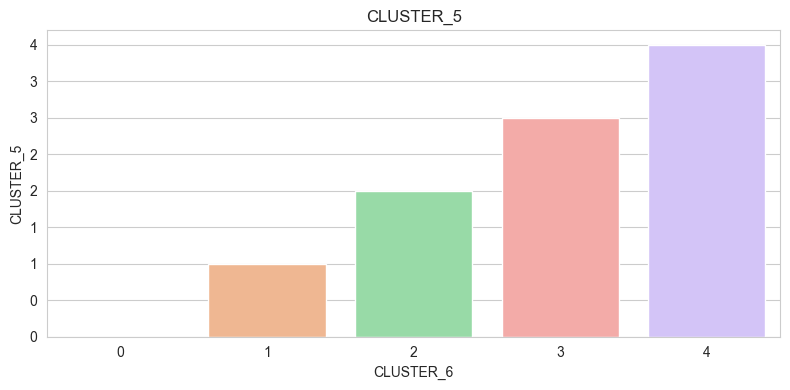

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


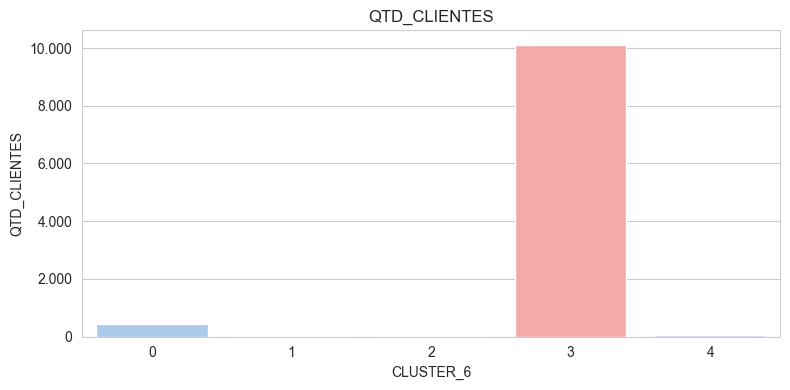

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


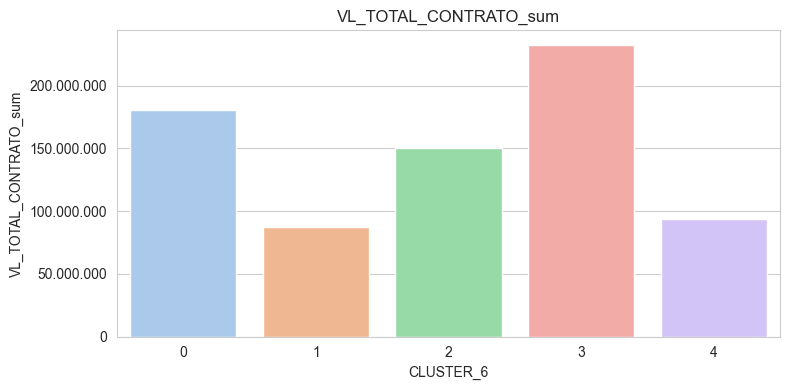

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


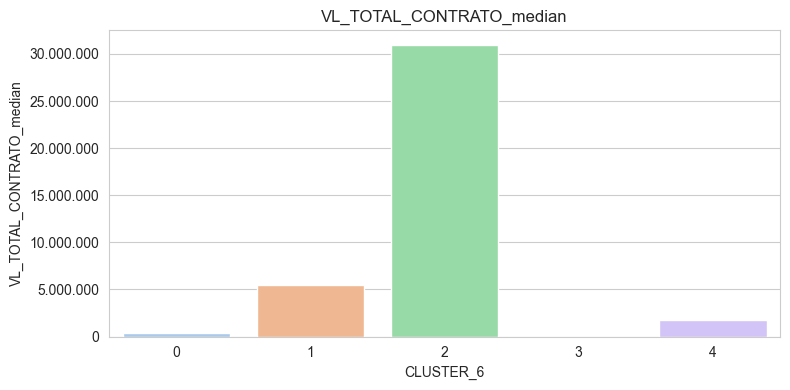

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


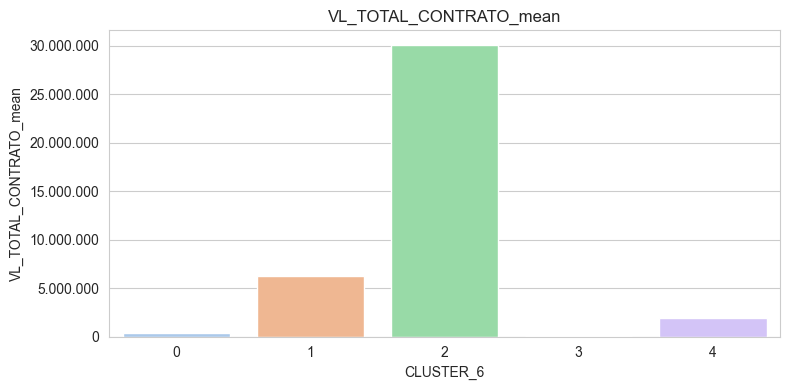

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


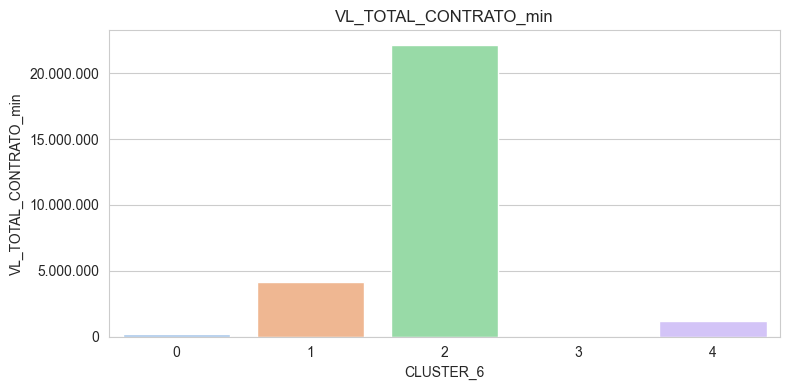

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


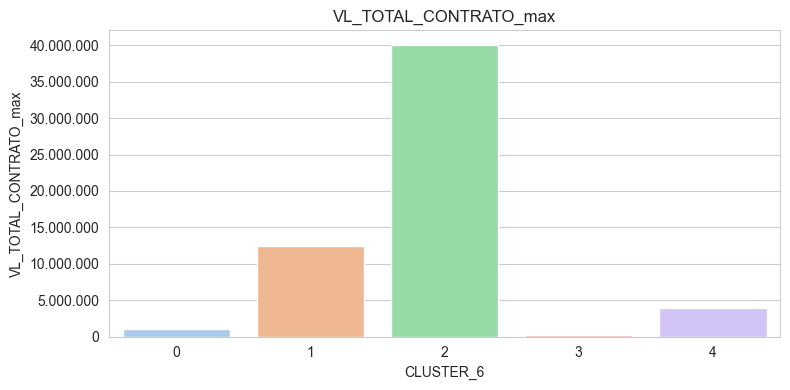

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


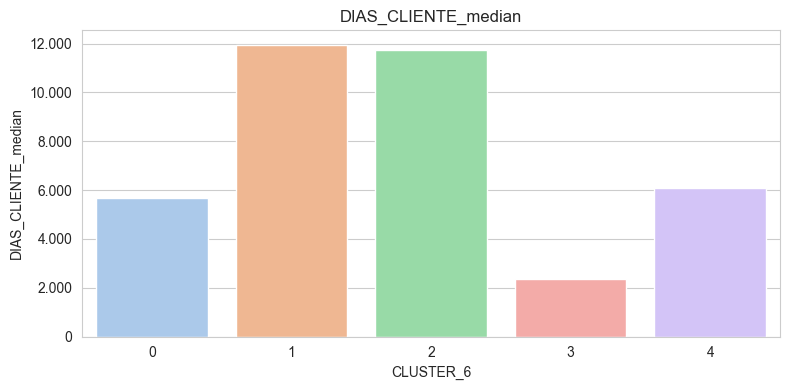

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


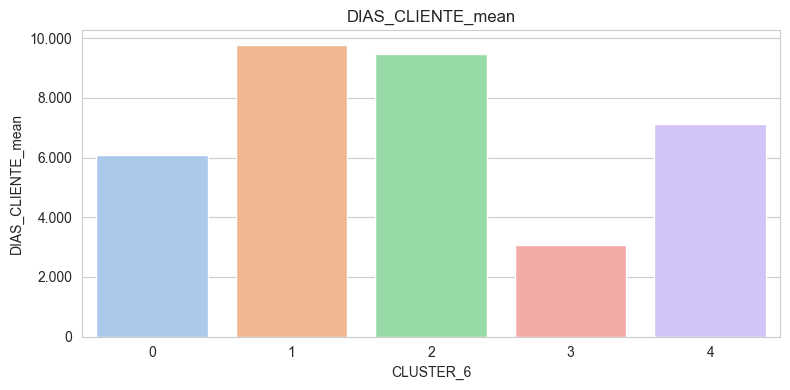

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


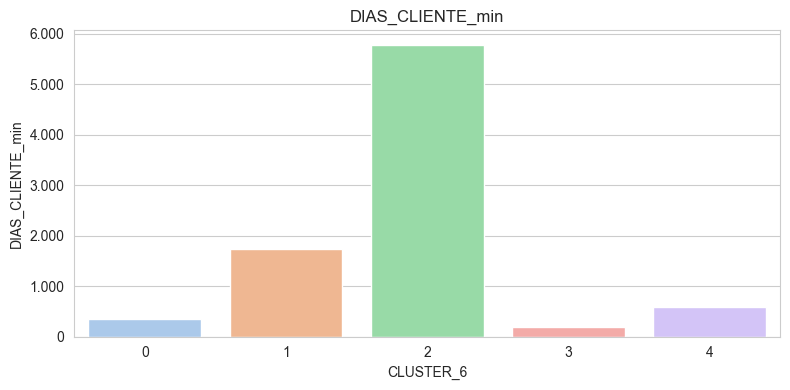

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


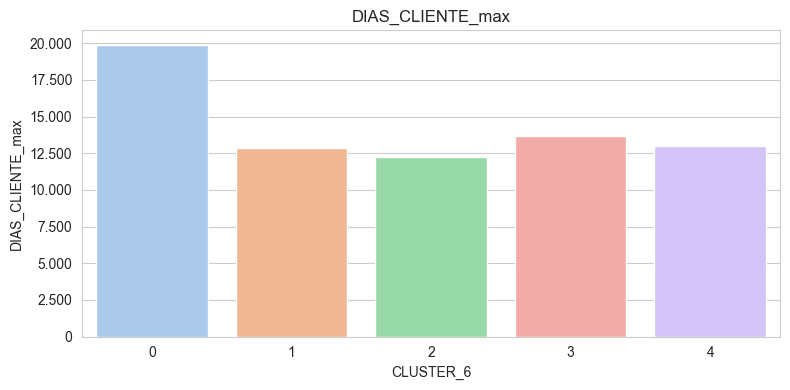

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


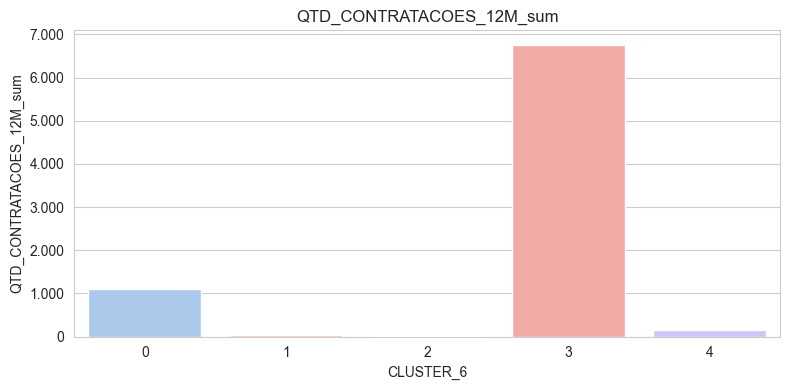

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


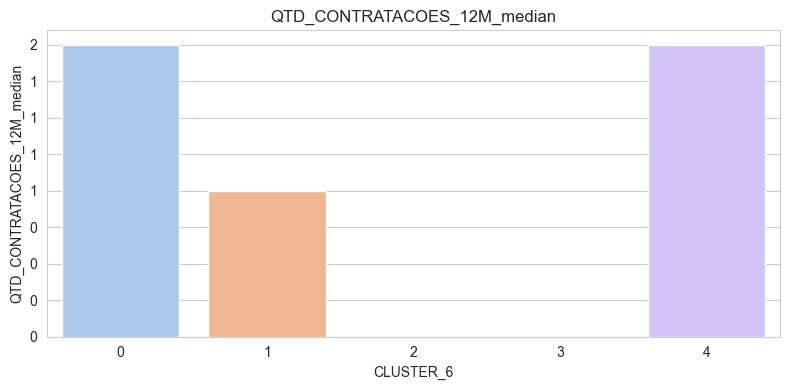

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


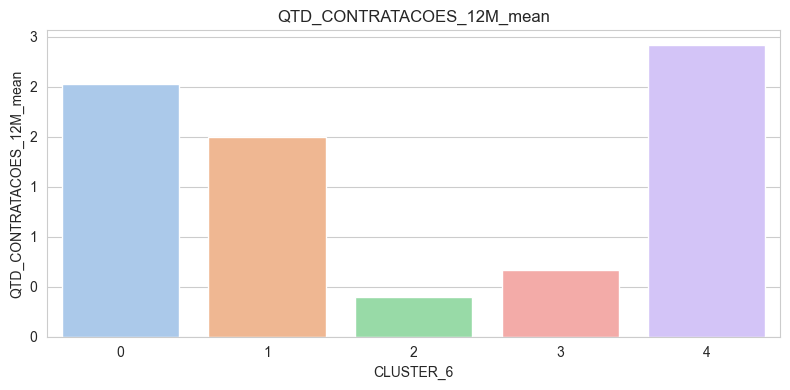

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


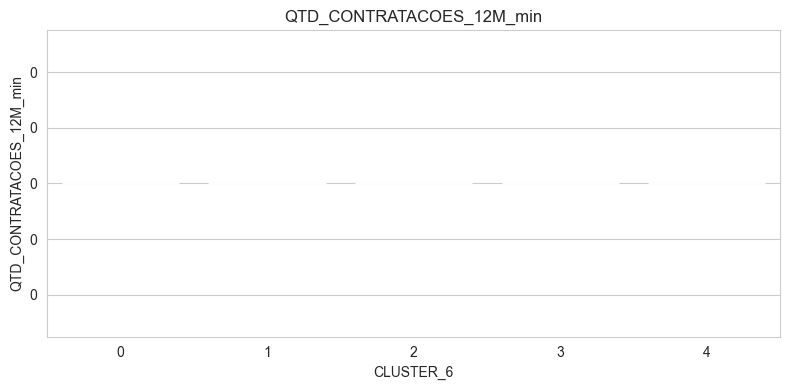

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


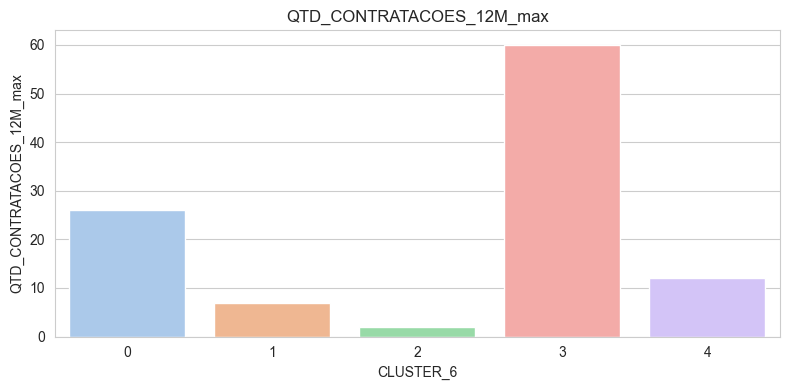

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


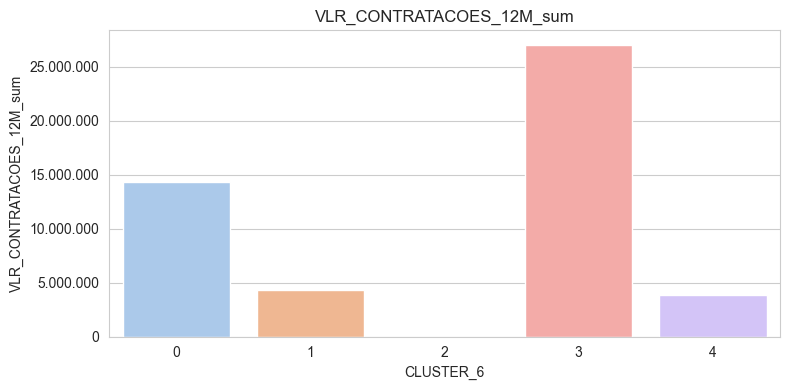

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


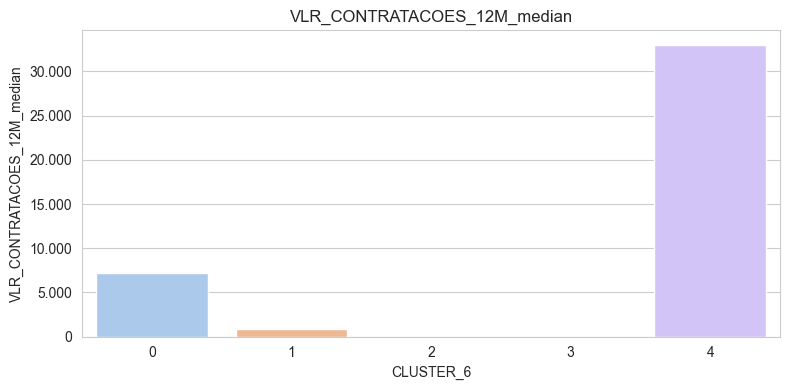

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


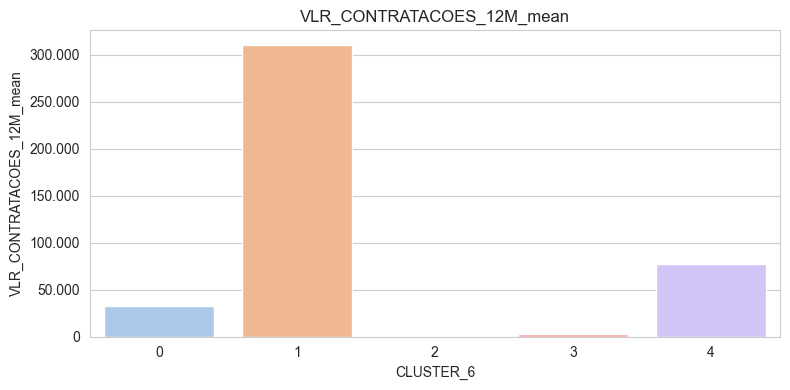

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


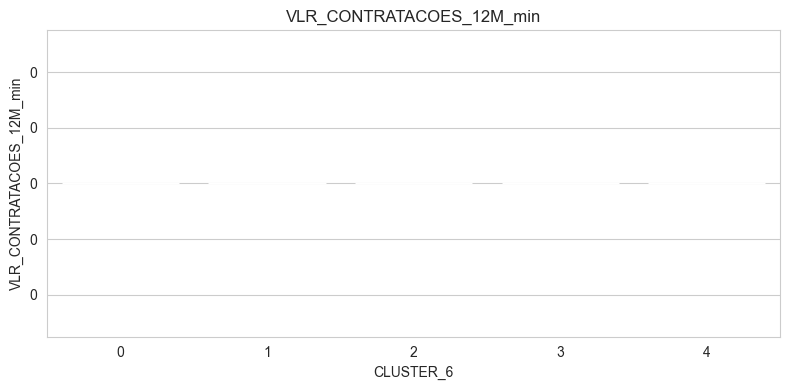

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


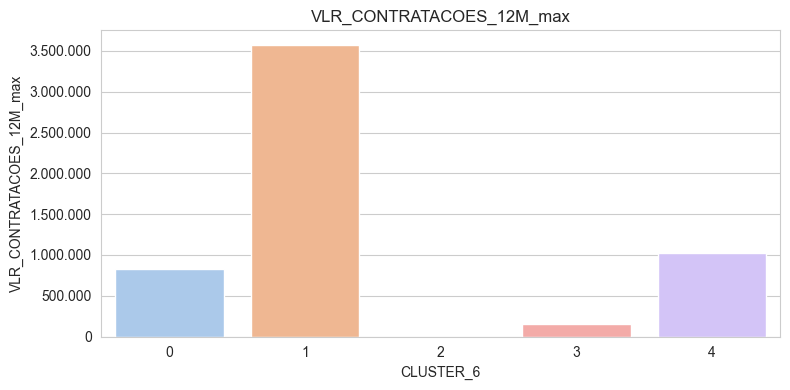

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


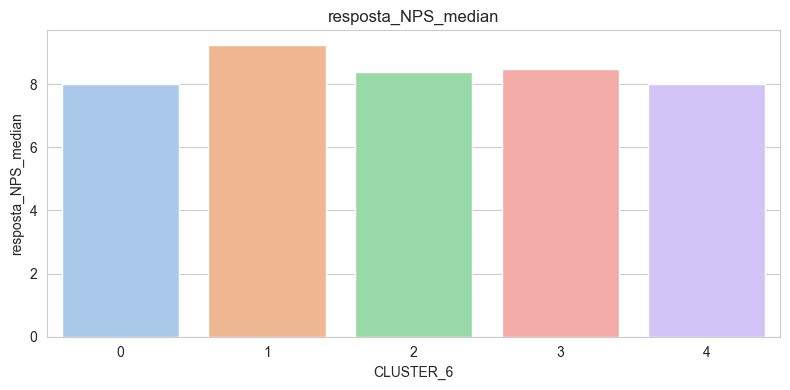

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


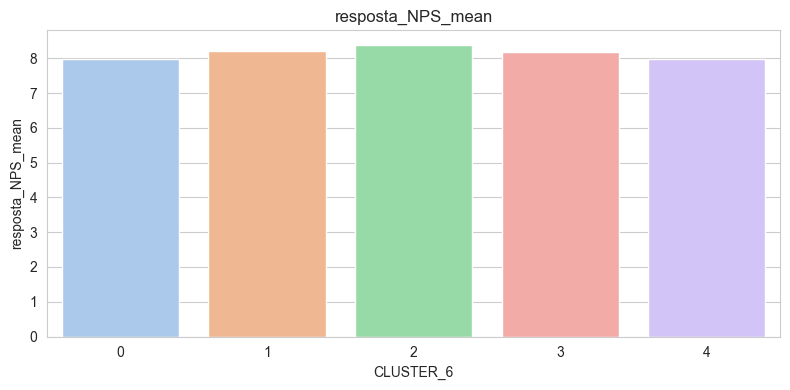

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


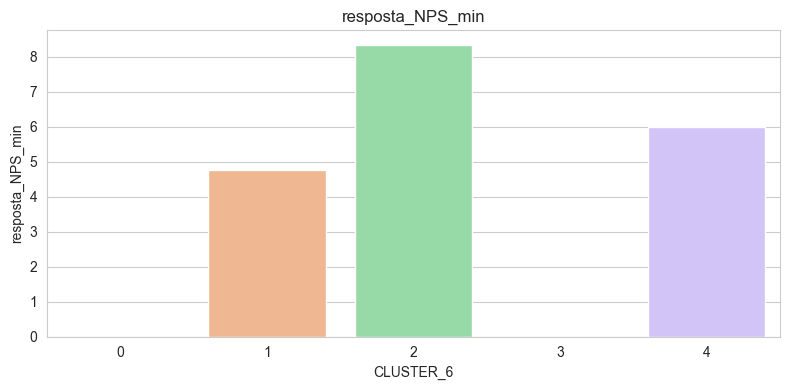

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


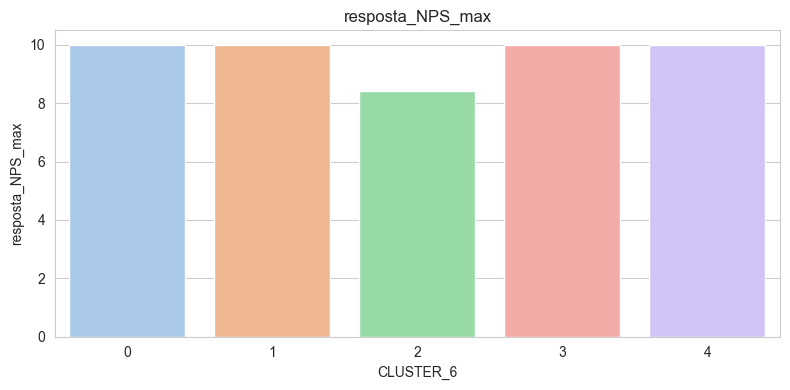

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


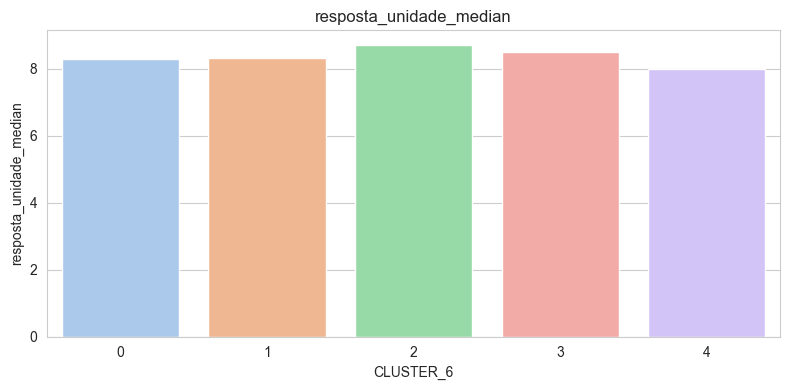

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


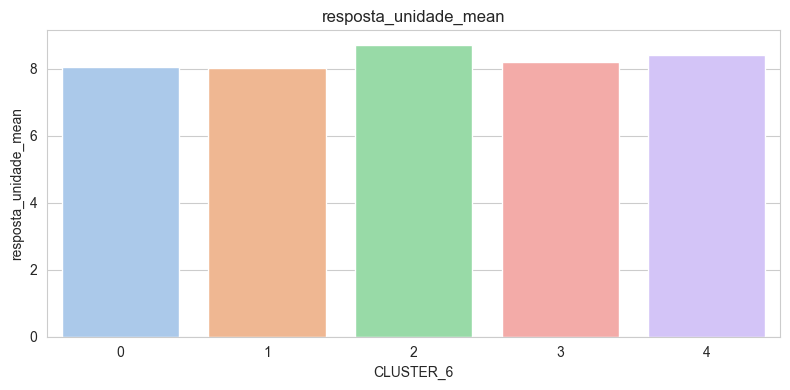

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


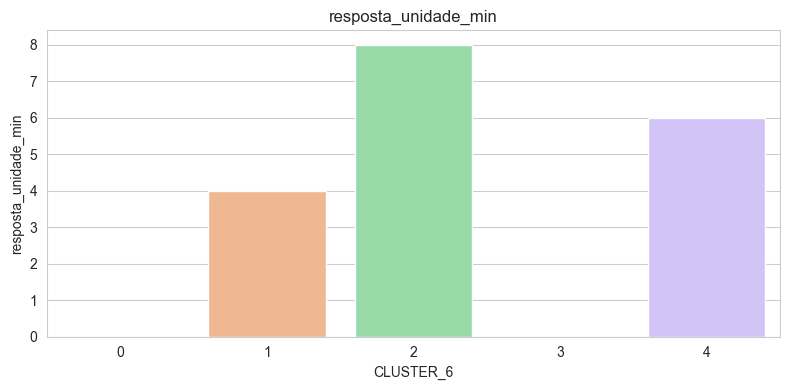

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


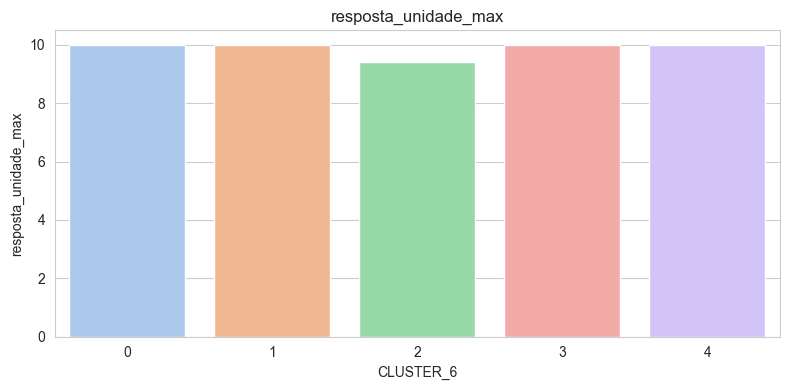

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


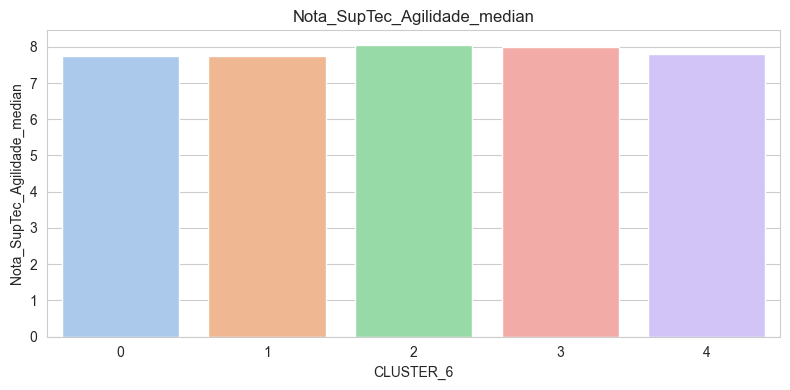

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


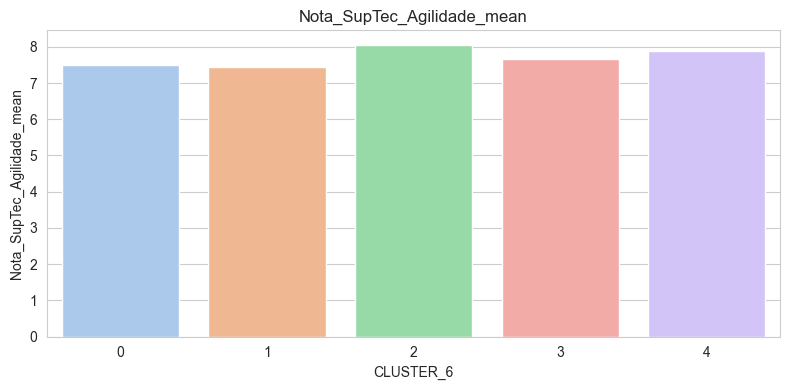

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


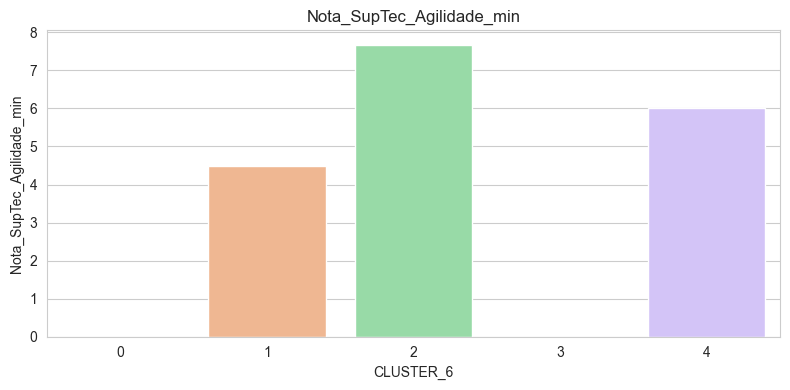

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


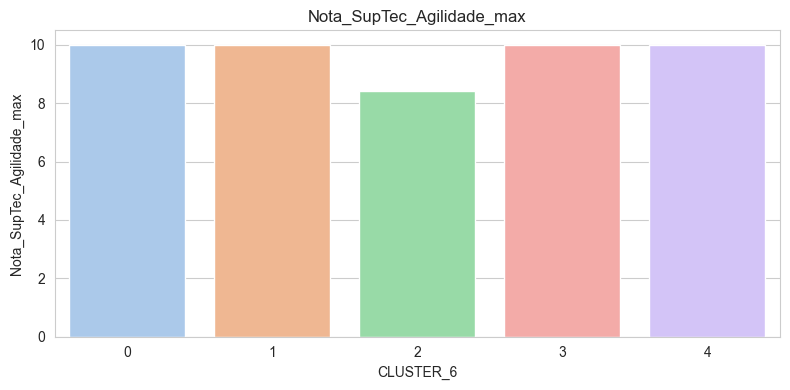

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


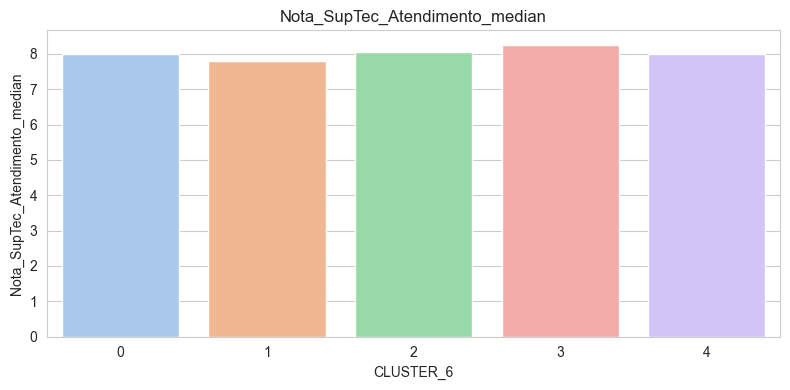

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


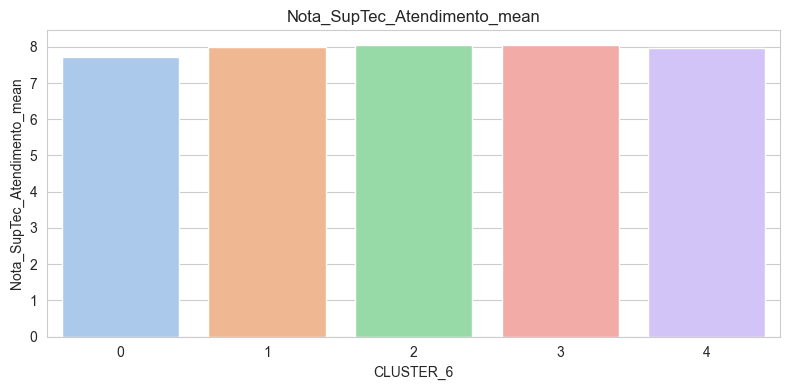

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


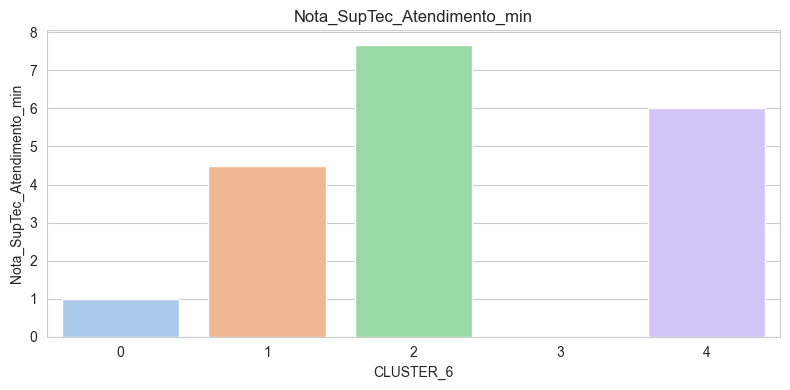

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


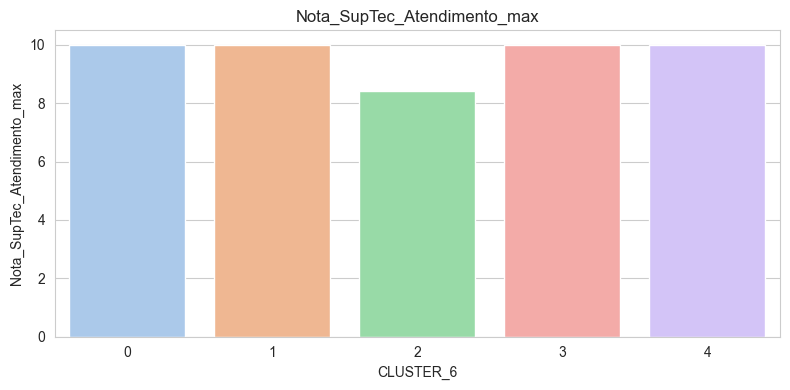

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


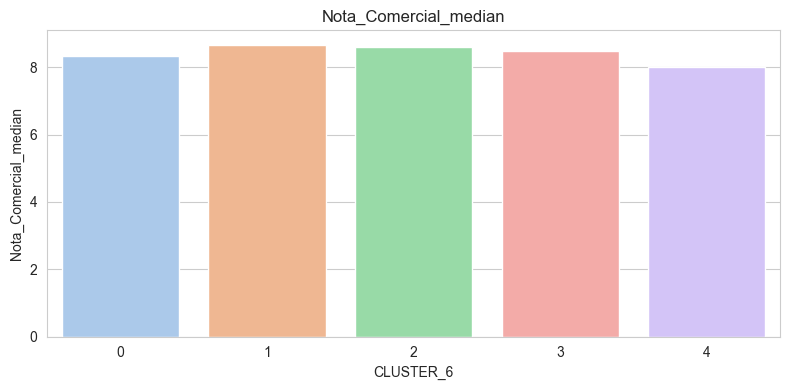

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


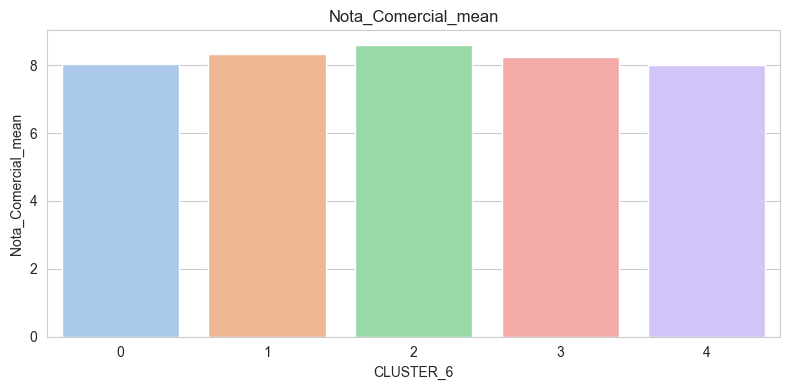

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


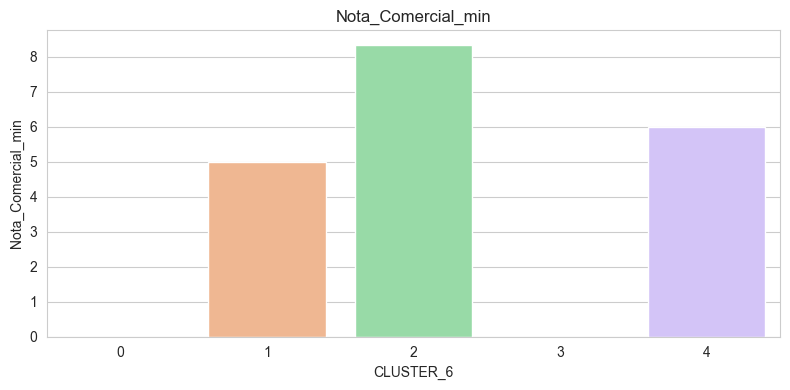

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


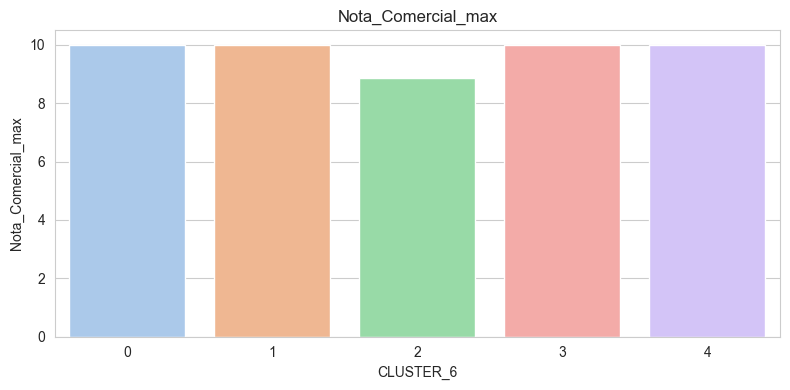

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


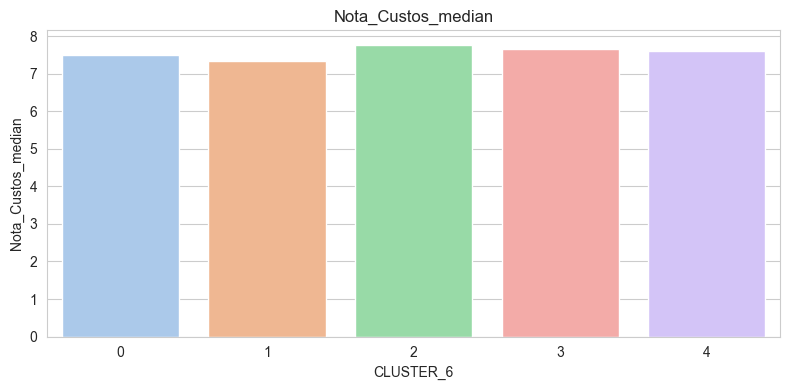

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


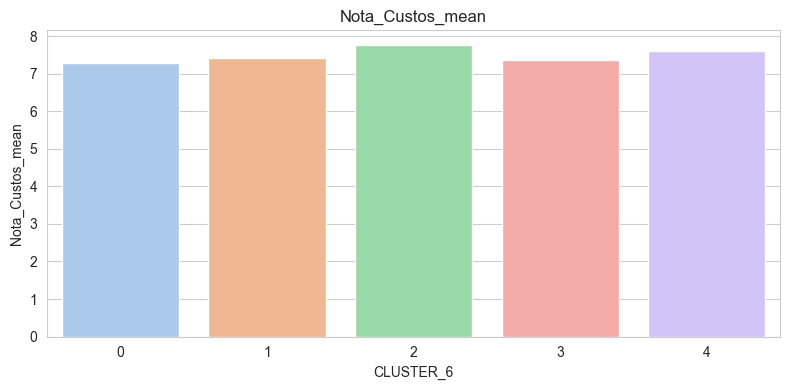

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


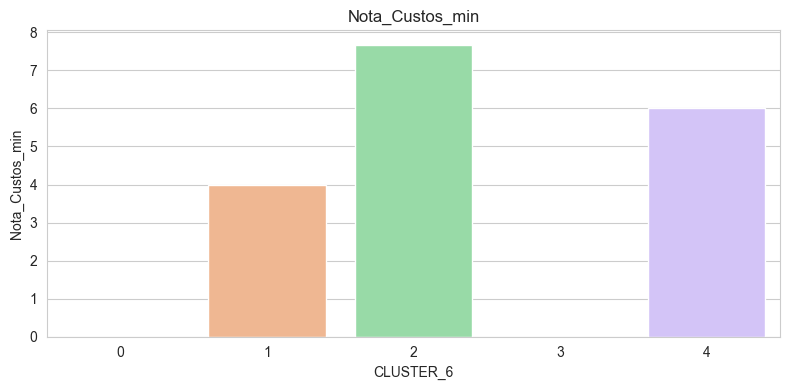

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


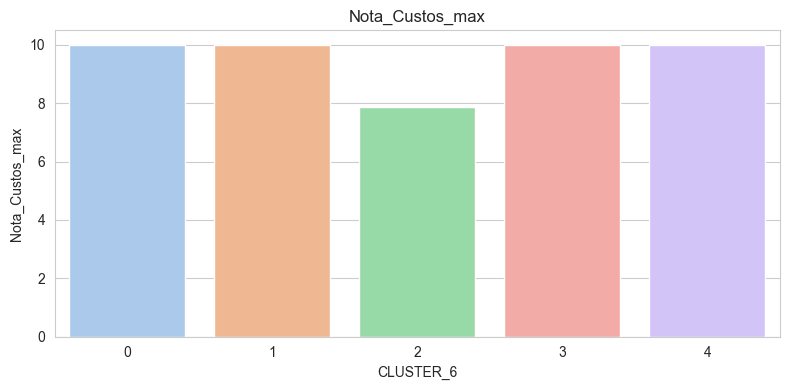

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


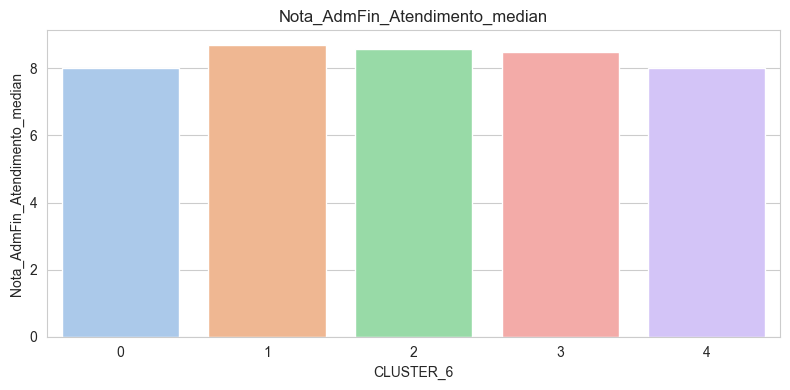

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


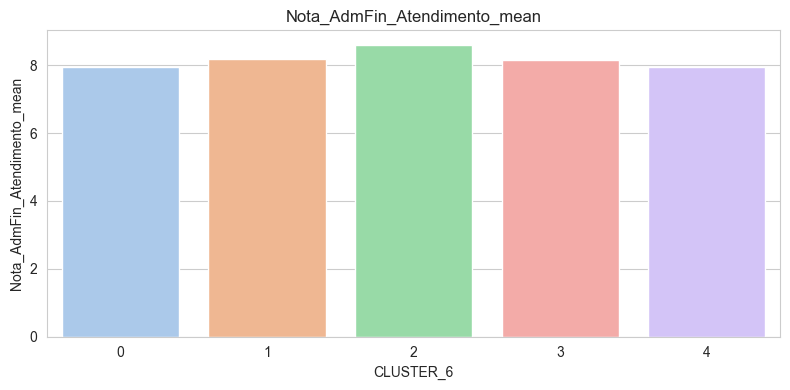

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


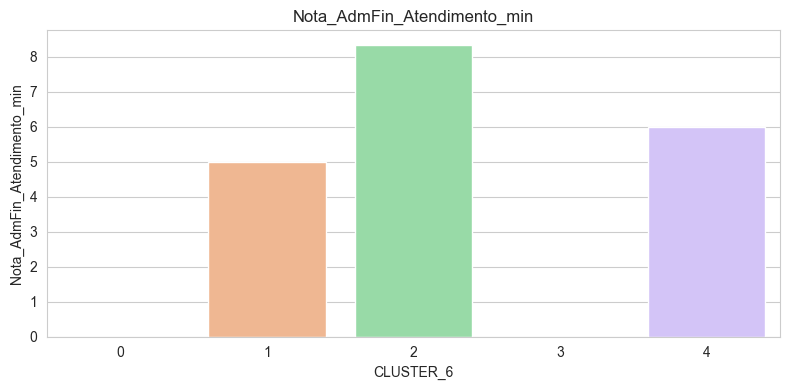

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


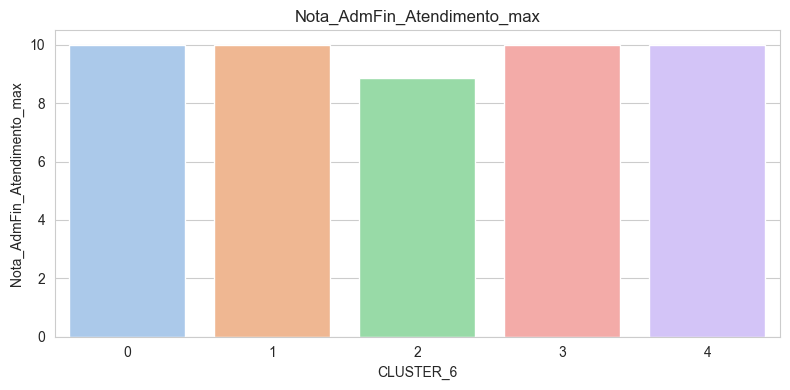

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


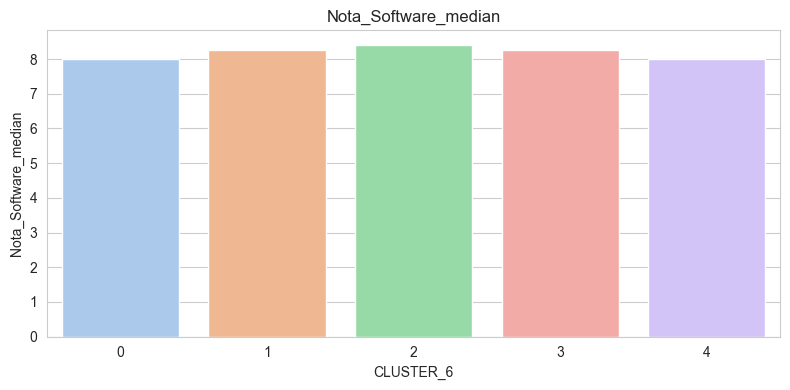

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


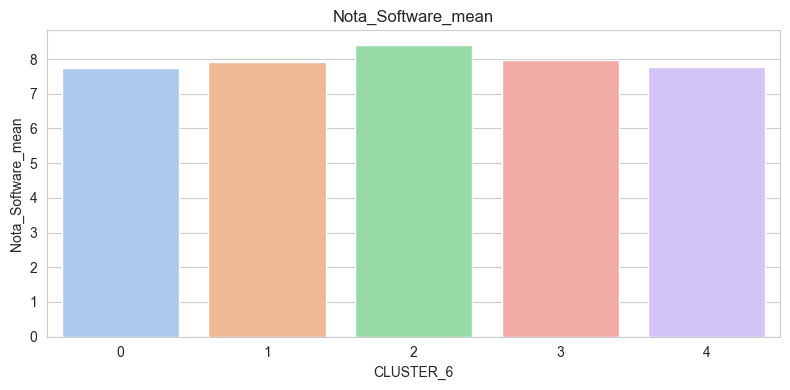

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


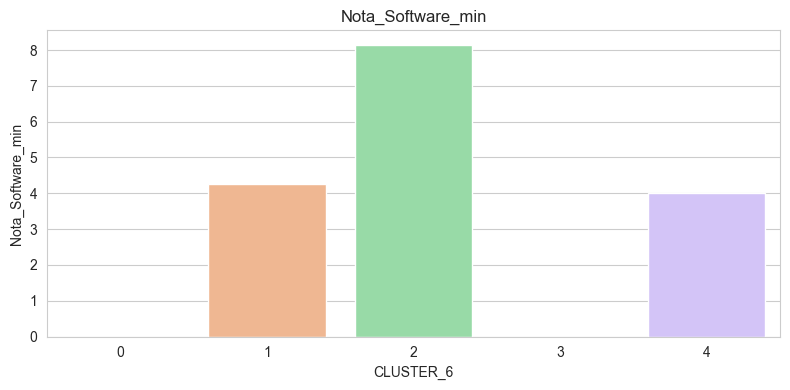

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


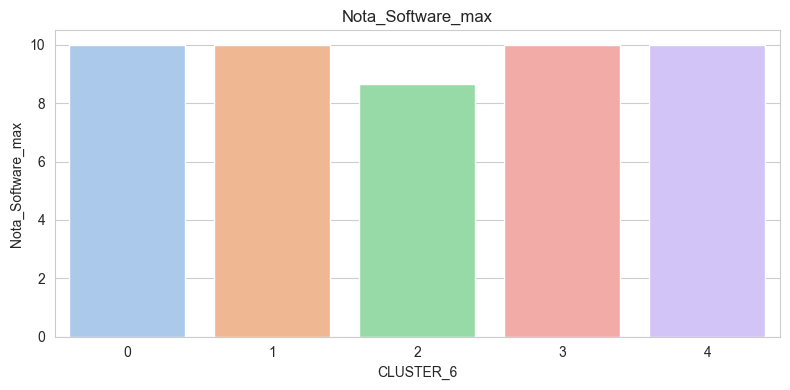

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


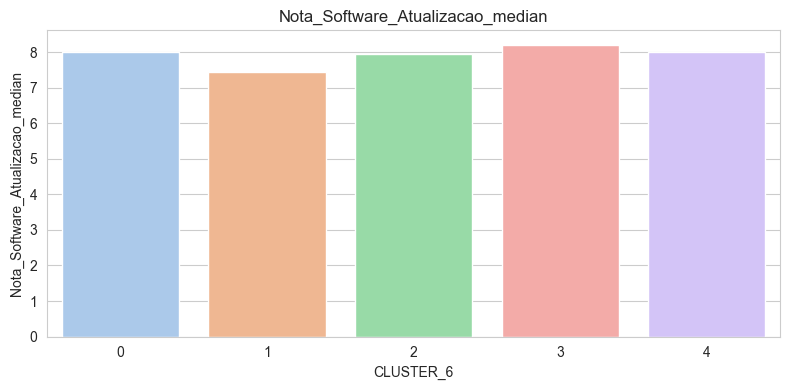

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


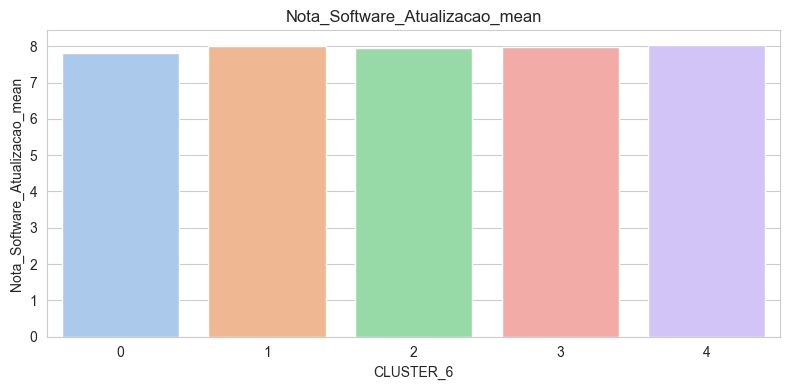

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


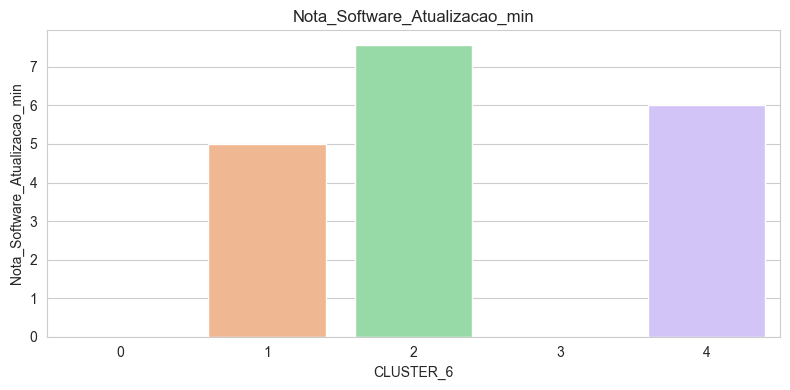

C:\Users\gxmar\AppData\Local\Temp\ipykernel_22100\77438398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")


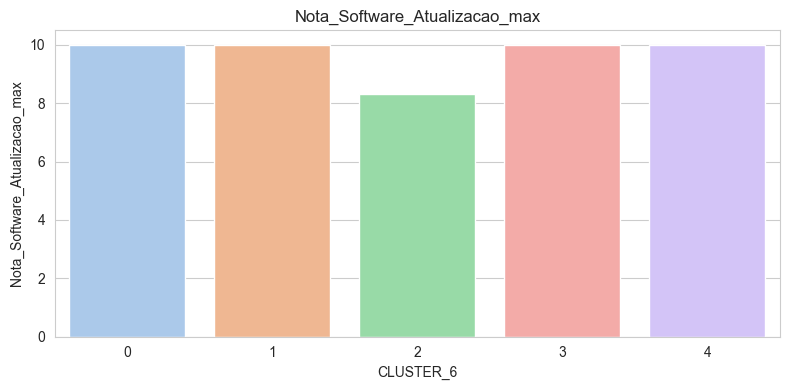

In [16]:
# Gráficos para visualização das colunas numéricas

# Tons pasteis
sns.set_palette("pastel")
sns.set_style("whitegrid")

# Plotando conforme a lista de colunas numéricas
for coluna in colunas_numericas:
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x=df_agrupado.index, y=df_agrupado[coluna], palette="pastel")
    plt.title(f'{coluna}')
    plt.xlabel('CLUSTER_6')
    plt.ylabel(coluna)
    # Formatando o eixo y para mostrar inteiros sem notação científica
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
    plt.tight_layout()
    plt.show()

## Primeiras observações Sobre os Dados Numéricos

- o cluster 2 é aquele com mais clientes, de longe
- o cluster 3 também tem um número significativo de clientes
- o cluster 2 também é aquele que apresenta o maior valor total de contratos com a totvs
- o cluster 1 concentra os clientes com os contratos mais caros, são poucos clientes com contratos muito valiosos (maior mediana e media de valor total dos contratos)
- o cluster 2 tem os clientes mais recentes, os clusters 3 e 4 apresentam clientes com tempo de casa médio de cerca de 6000 dias e os clusters 0, 1 e 5 apresentam clientes com bastante tempo de casa
- quando analisamos as contratações nos últimos 12 meses, os clientes do cluster 1 e 2 são aqueles com menos contratações em média
- os clientes do grupo 5 foram os que mais realizaram contratações
- de toda forma, o cluster 2 é o que mais movimentou valores nos  últimos 12 meses
- os grandes clientes, do cluster 1, quase não realizaram contratações nos últimos 12 meses
- a nota que os clientes dão para a totvs no geral é bem parecida
- a media de nota geral dos clientes do cluster 5 são ligeiramente melhores
- em diversos dos temas mais específicos, os clientes do cluster 5 apresentam as notas mais altas em média, e os do cluster 0, as notas mais baixas, apesar de semelhantes (agilidade no suporte técnico, atendimento do suporte técnico, atendimento administrativo e financeiro, software, atualização de software)

## Análise dos Dados Categóricos

In [17]:
df_agrupado

,CLUSTER_5,QTD_CLIENTES,DS_PROD_moda,DS_PROD_top5,DS_LIN_REC_moda,DS_LIN_REC_top5,CIDADE_moda,CIDADE_top5,DS_CNAE_moda,DS_CNAE_top5,...,Nota_AdmFin_Atendimento_min,Nota_AdmFin_Atendimento_max,Nota_Software_median,Nota_Software_mean,Nota_Software_min,Nota_Software_max,Nota_Software_Atualizacao_median,Nota_Software_Atualizacao_mean,Nota_Software_Atualizacao_min,Nota_Software_Atualizacao_max
0,0,436,SMS TOTVS TEC USER,"[SMS TOTVS TEC USER, CDU FULL TOTVS TRAD, CDU ...",CDU TOTVS SERIE T,"[CDU TOTVS SERIE T, SMS TOTVS SERIE T, SOFTWAR...",SAOPAULO,"[SAOPAULO, RIODEJANEIRO, CAMPINAS, BARUERI, CU...","Comercio varejista de mercadorias em geral, co...","[Comercio varejista de mercadorias em geral, c...",...,0.00,10.00,8.000,7.749021,0.00,10.00,8.00,7.826231,0.00,10.00
1,1,14,CDU FULL TOTVS TRAD,"[CDU FULL TOTVS TRAD, SMS FULL TOTVS TRAD, SMS...",CDU TOTVS SERIE T,"[CDU TOTVS SERIE T, SMS TOTVS SERIE T, SOFTWAR...",RIODEJANEIRO,"[SAOPAULO, RIODEJANEIRO, SOROCABA, CUIABA, BEL...",Aluguel de outras maquinas e equipamentos come...,[Fabricacao de artefatos de material plastico ...,...,5.00,10.00,8.250,7.915000,4.25,10.00,7.45,7.997000,5.00,10.00
2,2,5,AP.DN01.CsA,"[CT.RN01.CsA, CDU FULL TOTVS TRAD, CDU CORPORA...",CDU TOTVS SERIE T,[CDU TOTVS SERIE T],APARECIDA,"[NITEROI, SALVADOR, CURITIBA, APARECIDA, SAOPA...",Atividades de organizacoes religiosas,[Transporte rodoviario coletivo de passageiros...,...,8.33,8.86,8.405,8.405000,8.14,8.67,7.95,7.950000,7.57,8.33
3,3,10110,AHGORA ESTRATEGICO,"[AHGORA ESTRATEGICO, SMS TOTVS TEC USER, CDU F...",CDU TOTVS SERIE T,"[CDU TOTVS SERIE T, SAAS SERIE T, SMS TOTVS SE...",SAOPAULO,"[SAOPAULO, RIODEJANEIRO, BELOHORIZONTE, BRASIL...",Hoteis,"[Hoteis, Comercio varejista de mercadorias em ...",...,0.00,10.00,8.250,7.960089,0.00,10.00,8.20,7.976883,0.00,10.00
4,4,50,PROG OPED STUDIO ND USR MNT,"[PROG OPED STUDIO ND USR MNT, CDU CORP TOTVS M...",CDU TOTVS SERIE T,"[CDU TOTVS SERIE T, SOFTWARE COMPLEMENTAR, SMS...",SAOPAULO,"[SAOPAULO, RIODEJANEIRO, JOINVILLE, BRASILIA, ...",Educacao superior - graduacao e pos-graduacao,[Educacao superior - graduacao e pos-graduacao...,...,6.00,10.00,8.000,7.770741,4.00,10.00,8.00,8.035556,6.00,10.00


In [18]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CLUSTER_5                          5 non-null      int64  
 1   QTD_CLIENTES                       5 non-null      int64  
 2   DS_PROD_moda                       5 non-null      object 
 3   DS_PROD_top5                       5 non-null      object 
 4   DS_LIN_REC_moda                    5 non-null      object 
 5   DS_LIN_REC_top5                    5 non-null      object 
 6   CIDADE_moda                        5 non-null      object 
 7   CIDADE_top5                        5 non-null      object 
 8   DS_CNAE_moda                       5 non-null      object 
 9   DS_CNAE_top5                       5 non-null      object 
 10  DS_SEGMENTO_moda                   5 non-null      object 
 11  DS_SEGMENTO_top5                   5 non-null      object 
 12

In [19]:
# Seleção das colunas categóricas de top5
colunas_categoricas = [col for col in df_agrupado.columns if 'top5' in col.lower()]

In [20]:
# Removendo a coluna do país (está codificado)
colunas_categoricas.remove('PAIS_top5')

In [21]:
colunas_categoricas

['DS_PROD_top5',
 'DS_LIN_REC_top5',
 'CIDADE_top5',
 'DS_CNAE_top5',
 'DS_SEGMENTO_top5',
 'DS_SUBSEGMENTO_top5',
 'MARCA_TOTVS_top5',
 'MODAL_COMERC_top5',
 'PERIODICIDADE_top5',
 'UF_top5',
 'FAIXA_VLR_TOT_SOMA_CONTRATOS_top5']

In [22]:
# Exibindo o top 5 valores mais comuns para cada coluna categórica por cluster
for coluna in colunas_categoricas:
    print(f"==== {coluna} ====")
    for idx, row in df_agrupado.iterrows():
        cluster = row['CLUSTER_5']
        valores = row[coluna]
        print(f"Cluster {cluster}: {valores}")
    print()

==== DS_PROD_top5 ====
Cluster 0: ['SMS TOTVS TEC USER', 'CDU FULL TOTVS TRAD', 'CDU CORP TOTVS MANUFATURA RB2', 'PROG OPED STUDIO ND USR MNT', 'CDU CORPORATIVO RB2']
Cluster 1: ['CDU FULL TOTVS TRAD', 'SMS FULL TOTVS TRAD', 'SMS TOTVS TEC USER', 'CDU MNT ATIVOS NG TRAD', 'CDU CORP TOTVS MANUFATURA RB1']
Cluster 2: ['CT.RN01.CsA', 'CDU FULL TOTVS TRAD', 'CDU CORPORATIVO RB2', 'AP.DN01.CsA', 'SMS TOTVS TEC USER']
Cluster 3: ['AHGORA ESTRATEGICO', 'SMS TOTVS TEC USER', 'CDU FULL TOTVS TRAD', 'SMS USUARIO RETAGUARDA WT', 'AHGORA MULTI']
Cluster 4: ['PROG OPED STUDIO ND USR MNT', 'CDU CORP TOTVS MANUFATURA RB2', 'SMS TOTVS TEC USER', 'PROG OPED ENT RDBMS MNT', 'CDU FULL TOTVS TRAD']

==== DS_LIN_REC_top5 ====
Cluster 0: ['CDU TOTVS SERIE T', 'SMS TOTVS SERIE T', 'SOFTWARE COMPLEMENTAR', 'SAAS SERIE T', 'SAAS INTERA SOFTWARE']
Cluster 1: ['CDU TOTVS SERIE T', 'SMS TOTVS SERIE T', 'SOFTWARE COMPLEMENTAR', 'SAAS SERIE T', 'SAAS BEMATECH']
Cluster 2: ['CDU TOTVS SERIE T']
Cluster 3: ['CDU TOTV

- temos uma predominância de clientes de são Paulo nos clusters 0, 2, 3, 4 e 5 e do rio de janeiro nos clusters 2, 3, 4 e 5
- o cluster 2, aquele com mais clientes, tem predomínio de hotéis, supermercados, restaurantes e lanchonetes
- o cluster 3, que também tem um número significativo de clientes, tem predomínio de supermercados, escritórios (área administrativa), transporte rodoviário, pessoas físicas e planos de saúde
- o cluster 4 reúne pessoas físicas, entidades de ensino superior, comerciantes de matéria prima agrícola, construtoras de rodovias e ferrovias e empresas de laticínios
- destaque para a indústria no cluster 0
- o cluster 1 reúne empresas de transporte rodoviário de passageiros, serviços educacionais, comercio de joias, atividades religiosas e serviços de engenharias
- o cluster 5 tem destaque para  indústria, comerciantes de matéria prima agrícola, gestão de imóveis e atividades de associações de defesa de direitos sociais